<center><img src="../../../images/naive_bayes.png" alt="error" width="1000"/></center>

In [2]:
import pandas as pd 

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

<span style="color:#D35400">**1. Gaussian Naive Bayes (GNB):**</span>
- **Use When:** Features are **normally distributed** (continuous data).
- **Example:** Height, weight, temperature.

<span style="color:#28B463">**2. Multinomial Naive Bayes (MNB):**</span>
- **Use When:** Features are **discrete counts** or frequencies.
- **Example:** Word counts in text classification (Bag of Words).

<span style="color:#3498DB">**3. Bernoulli Naive Bayes (BNB):**</span>
- **Use When:** Features are **binary/Boolean** (0 or 1).
- **Example:** Binary text data (presence/absence of words in a document).


In [3]:
data = pd.read_csv('../../../datasets/iris.csv')
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [29]:
data.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [30]:
data['Species'].value_counts()


Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [31]:
x = data.drop(columns='Species')
y = data['Species']

In [32]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=23,stratify=y)

### Naive Bayes

In [33]:
model = MultinomialNB()

In [34]:
model.fit(x_train,y_train)

MultinomialNB()

In [35]:
y_pred = model.predict(x_test)

In [36]:
accuracy_score(y_test,y_pred)


0.9333333333333333

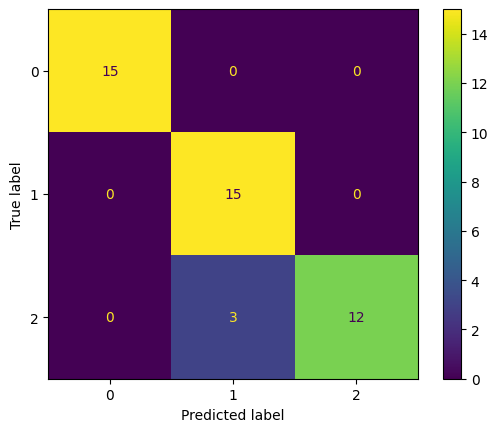

In [37]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.83      1.00      0.91        15
   virginica       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

